# Project - Lending Club Case Study

# 

## Data Processing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#reading The Dataset
#since getting an error with loading column 47, converting the data to string type 

lending_set = pd.read_csv("C:\\Users\\chira\\Downloads\\loan\\loan.csv", dtype={"next_pymnt_d":"str"})

In [3]:
#printing the dataset to check the columns and their vlaues

lending_set.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
# checking shape of the dataset

print("Size of original Dataset: ",lending_set.shape)

Size of original Dataset:  (39717, 111)


In [5]:
#checking the number of unique values in each column of the dataset
#converting the unique_values count of each column to a data frame

unique_values = lending_set.nunique(axis=0).to_frame()
print(unique_values)

                                0
id                          39717
member_id                   39717
loan_amnt                     885
funded_amnt                  1041
funded_amnt_inv              8205
...                           ...
tax_liens                       1
tot_hi_cred_lim                 0
total_bal_ex_mort               0
total_bc_limit                  0
total_il_high_credit_limit      0

[111 rows x 1 columns]


In [6]:
#converting the unique_values count of each column to a data frame
#saving the list of columns with more than one unique values as "filter1"
#Since the columns that have all same value or no values are not needed for analysis, applying "filter1" on the dataset
#Saving the Dataset as Lending_set1
#and finally checking the dataset size

unique_value1 = unique_values[unique_values[0]>1]
filter1 = list(unique_value1.index)
lending_set1=lending_set.filter(filter1)
print("Lending Case Study Dataset-1 size: ", lending_set1.shape)

Lending Case Study Dataset-1 size:  (39717, 48)


## Data Cleaning

In [7]:
# dropping columns ["url", "desc", "zip_code", "emp_title","title"]
# because the above given columns are not infering any information related to loan repayments
# zip_code infomation is not fully provided, so dropped

lending_set1= lending_set1.drop(columns=["url", "desc", "zip_code", "emp_title","title"])

In [8]:
#checking the shape and data type of each column in dataset_1

print("shape of the lending_set1:", lending_set1.shape)
lending_set1.dtypes

shape of the lending_set1: (39717, 43)


id                           int64
member_id                    int64
loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                    object
installment                float64
grade                       object
sub_grade                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
purpose                     object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
mths_since_last_delinq     float64
mths_since_last_record     float64
open_acc                     int64
pub_rec                      int64
revol_bal                    int64
revol_util                  object
total_acc           

In [9]:
# spliting the Column "term" values to "int" and forming a new column "term_months"
# Dropping the "term"  column

lending_set1["term_months"] = lending_set1.term.str.split().str[0]
lending_set1.drop(columns=["term"])
lending_set1["term_months"]=lending_set1["term_months"].astype("int64")

In [10]:
# Since thr "int_rate" column has a "%" symbol in it, we need to remove the symbol and naming the new column as "interest_rate" 
# changing the data type of interest_rate column
lending_set1["interest_rate"] = lending_set1["int_rate"].str.split("%").str[0]
lending_set1["interest_rate"]=lending_set1["interest_rate"].astype("float64")

In [11]:
#checking the column
lending_set1["interest_rate"].head()
# Dropping the "int_rate" Column
lending_set1.drop(columns="int_rate")
#checking the shape
print("Data set-1 shape: ",lending_set1.shape)

Data set-1 shape:  (39717, 45)


In [12]:
#getting the missing values in each column
missing_data_analysis=lending_set1.isna().sum().to_frame()
#giving column names to the dataframe
missing_data_analysis.columns = ["NA_count"]
#calculating the missing value percentage of all the records
missing_data_analysis["missing_percent"] = missing_data_analysis["NA_count"]*(100/39717)

In [13]:
missing_data_analysis

## dropping the columns with more that 50% missing Values

,NA_count,missing_percent
id,0,0.000000
member_id,0,0.000000
loan_amnt,0,0.000000
funded_amnt,0,0.000000
funded_amnt_inv,0,0.000000
term,0,0.000000
int_rate,0,0.000000
installment,0,0.000000
grade,0,0.000000
sub_grade,0,0.000000


In [14]:
#checking data type of "issue_d" column
lending_set1["issue_d"].dtypes
#changing the datatype of "issue_d" column to date
lending_set1["issue_d"]=pd.to_datetime(lending_set1["issue_d"], format="%b-%y")

In [15]:
lending_set1["loan_status"].unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [16]:
#To understand the indicator of loan defaulter we need to look into customers who have "Fully paid" the loan or defaulted(charged off) the loan
#The loans with current status can be dropped
lending_set1 = lending_set1[lending_set1["loan_status"] != 'Current']

In [17]:
#cheking the shape of data set again, to confirm the deletion of current category 
lending_set1.shape

(38577, 45)

In [18]:
# #checking data type of "earliest_cr_line" column
lending_set1["earliest_cr_line"].dtypes
#changing the datatype of "issue_d" column to date
lending_set1.loc[:,"earliest_cr_line"] = pd.to_datetime(lending_set1.loc[:,"earliest_cr_line"], format="%b-%y")

In [19]:
lending_set1["earliest_cr_line"].head()

0   1985-01-01
1   1999-04-01
2   2001-11-01
3   1996-02-01
5   2004-11-01
Name: earliest_cr_line, dtype: datetime64[ns]

In [20]:
lending_set1["revol_util"].head()

0    83.70%
1     9.40%
2    98.50%
3       21%
5    28.30%
Name: revol_util, dtype: object

In [21]:
#converting the revot_util to float datatype 
lending_set1["revol_util"] = lending_set1["revol_util"].str.split("%").str[0]
lending_set1["revol_util"].astype("float64")

0        83.7
1         9.4
2        98.5
3        21.0
5        28.3
         ... 
39712    13.1
39713    26.9
39714    19.4
39715     0.7
39716    51.5
Name: revol_util, Length: 38577, dtype: float64

In [22]:
#changing the datatype of "last_pymnt_d" column to datetime
lending_set1.loc[:,"last_pymnt_d"] = pd.to_datetime(lending_set1.loc[:,"last_pymnt_d"], format="%b-%y")

In [23]:
#changing the datatype of "next_pymnt_d" column to datetime
lending_set1.loc[:,"next_pymnt_d"] = pd.to_datetime(lending_set1.loc[:,"next_pymnt_d"], format="%b-%y")

In [24]:
#checking both "last_pymnt_d" and "next_pymnt_d" dtypes
lending_set1["last_pymnt_d"].dtypes

dtype('<M8[ns]')

In [25]:
lending_set1["next_pymnt_d"].dtypes

dtype('<M8[ns]')

In [26]:
lending_set1["last_credit_pull_d"].head()

0    May-16
1    Sep-13
2    May-16
3    Apr-16
5    Jan-16
Name: last_credit_pull_d, dtype: object

In [27]:
#converting "last_credit_pull_d" column to datetime format

lending_set1.loc[:,"last_credit_pull_d"] = pd.to_datetime(lending_set1.loc[:,"last_credit_pull_d"], format="%b-%y")

In [28]:
lending_set1["last_credit_pull_d"].head()

0   2016-05-01
1   2013-09-01
2   2016-05-01
3   2016-04-01
5   2016-01-01
Name: last_credit_pull_d, dtype: datetime64[ns]

In [29]:
#finally checking the dataset, one final review
lending_set1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       38577 non-null  int64         
 1   member_id                38577 non-null  int64         
 2   loan_amnt                38577 non-null  int64         
 3   funded_amnt              38577 non-null  int64         
 4   funded_amnt_inv          38577 non-null  float64       
 5   term                     38577 non-null  object        
 6   int_rate                 38577 non-null  object        
 7   installment              38577 non-null  float64       
 8   grade                    38577 non-null  object        
 9   sub_grade                38577 non-null  object        
 10  emp_length               37544 non-null  object        
 11  home_ownership           38577 non-null  object        
 12  annual_inc               38577 n

### Everthing is set for Analysis

#### Before proceeding to analysis a detailed review of the clean data would
#### help in understanding what columns would be helpful in analysing the Risk

- loan_amnt
- term
- int_rate
- installment
- emp_length
- home_ownership
- annual_inc
- verification_status
- issue_d
- purpose
- dti
- delinq_2yrs
- earliest_cr_line
- inq_last_6mths
- mths_since_last_delinq
- mths_since_last_record
- open_acc
- pub_rec
- revol_bal
- revol_util
- total_acc
- pub_rec_bankruptcies

The Above columns would be useful in analysing the risk, as these values are necessery for an individual to submit and choose before acquiring a loan and majorly these keys will be the main driving factors for LC to approve or reject a loan.

In [30]:
#dropping of the unnecessery columns form the dataset
lending_set1=lending_set1.drop(columns=["funded_amnt_inv","sub_grade","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","next_pymnt_d","last_credit_pull_d"])

In [31]:
lending_set1.columns
#writing a function to mark defaulties in the "defaulty" column
def f(x):
    if x == "Fully Paid":
        return 0
    else :
        return 1

lending_set1["defaulty"] = lending_set1["loan_status"].apply(f)

In [32]:
lending_set1.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'pub_rec_bankruptcies', 'term_months', 'interest_rate', 'defaulty'],
      dtype='object')

In [33]:
lending_set1 = lending_set1.drop(columns=["term","int_rate","mths_since_last_record","mths_since_last_delinq"])
lending_set1["verification_status"].replace(to_replace='Source Verified',value='Verified',inplace=True)


In [34]:
lending_set1

,id,member_id,loan_amnt,funded_amnt,installment,grade,emp_length,home_ownership,annual_inc,verification_status,...,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,term_months,interest_rate,defaulty
0,1077501,1296599,5000,5000,162.87,B,10+ years,RENT,24000.0,Verified,...,1,3,0,13648,83.70,9,0.0,36,10.65,0
1,1077430,1314167,2500,2500,59.83,C,< 1 year,RENT,30000.0,Verified,...,5,3,0,1687,9.40,4,0.0,60,15.27,1
2,1077175,1313524,2400,2400,84.33,C,10+ years,RENT,12252.0,Not Verified,...,2,2,0,2956,98.50,10,0.0,36,15.96,0
3,1076863,1277178,10000,10000,339.31,C,10+ years,RENT,49200.0,Verified,...,1,10,0,5598,21,37,0.0,36,13.49,0
5,1075269,1311441,5000,5000,156.46,A,3 years,RENT,36000.0,Verified,...,3,9,0,7963,28.30,12,0.0,36,7.90,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,78.42,A,4 years,MORTGAGE,110000.0,Not Verified,...,0,13,0,7274,13.10,40,NaN,36,8.07,0
39713,90665,90607,8500,8500,275.38,C,3 years,RENT,18000.0,Not Verified,...,1,6,0,8847,26.90,9,NaN,36,10.28,0
39714,90395,90390,5000,5000,156.84,A,< 1 year,MORTGAGE,100000.0,Not Verified,...,0,11,0,9698,19.40,20,NaN,36,8.07,0
39715,90376,89243,5000,5000,155.38,A,< 1 year,MORTGAGE,200000.0,Not Verified,...,0,17,0,85607,0.70,26,NaN,36,7.43,0


# Univariate Analysis

C:\Users\chira\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='funded_amnt', ylabel='Density'>

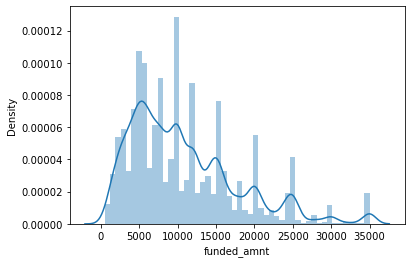

In [35]:
sns.distplot(lending_set1.funded_amnt)

Text(0, 0.5, 'Loan amnount')

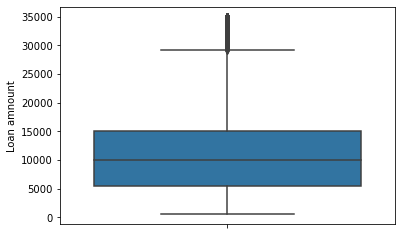

In [36]:
sns.boxplot(y=lending_set["loan_amnt"])
plt.ylabel("Loan amnount")

C:\Users\chira\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='interest_rate', ylabel='Density'>

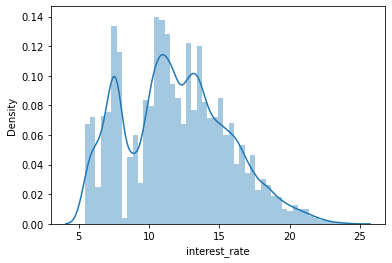

In [37]:
sns.distplot(lending_set1.interest_rate)

C:\Users\chira\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='installment', ylabel='Density'>

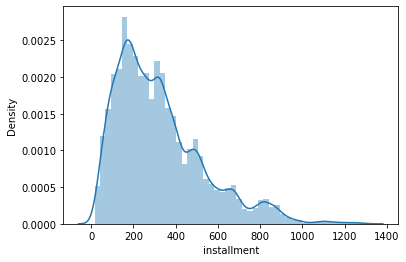

In [38]:
sns.distplot(lending_set1.installment)

Text(0.5, 6.79999999999999, 'Annual income')

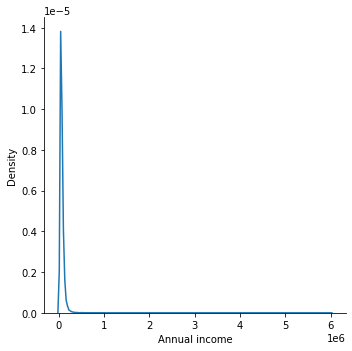

In [39]:
sns.displot(lending_set1.annual_inc,kind='kde')
plt.xlabel("Annual income")

Text(0.5, 6.79999999999999, 'Total credit revolving balance')

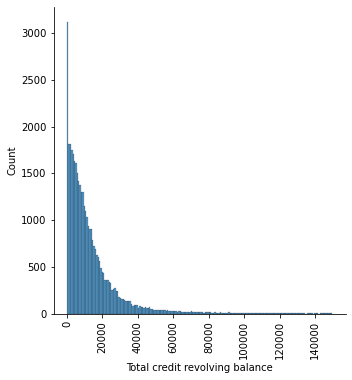

In [40]:
sns.displot(lending_set1.revol_bal)
plt.xticks(rotation=90)
plt.xlabel("Total credit revolving balance")

Text(0.5, 0, 'Loan Status')

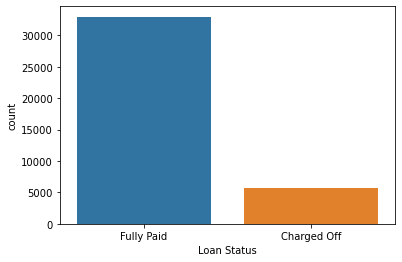

In [41]:
sns.countplot(x=lending_set1["loan_status"])
plt.xlabel("Loan Status")

C:\Users\chira\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '10+ years'),
  Text(1, 0, '< 1 year'),
  Text(2, 0, '3 years'),
  Text(3, 0, '8 years'),
  Text(4, 0, '9 years'),
  Text(5, 0, '4 years'),
  Text(6, 0, '5 years'),
  Text(7, 0, '1 year'),
  Text(8, 0, '6 years'),
  Text(9, 0, '2 years'),
  Text(10, 0, '7 years')])

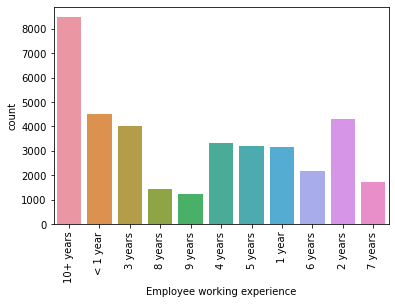

In [42]:
sns.countplot(lending_set1["emp_length"])
plt.xlabel("Employee working experience")
plt.xticks(rotation=90)

C:\Users\chira\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, '10+ years'),
  Text(1, 0, '< 1 year'),
  Text(2, 0, '3 years'),
  Text(3, 0, '8 years'),
  Text(4, 0, '9 years'),
  Text(5, 0, '4 years'),
  Text(6, 0, '5 years'),
  Text(7, 0, '1 year'),
  Text(8, 0, '6 years'),
  Text(9, 0, '2 years'),
  Text(10, 0, '7 years')])

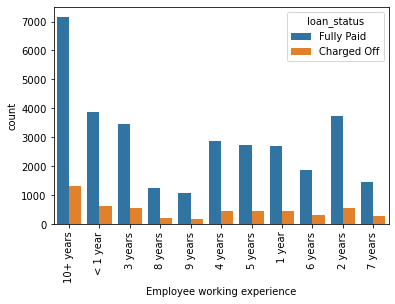

In [62]:
sns.countplot(lending_set1["emp_length"], hue=lending_set1.loan_status)
plt.xlabel("Employee working experience")
plt.xticks(rotation=90)

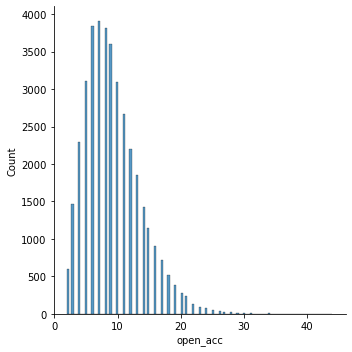

In [43]:
sns.displot(lending_set1.open_acc)



<AxesSubplot:xlabel='grade', ylabel='count'>

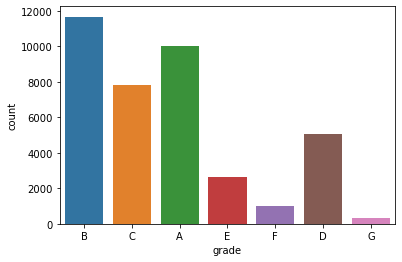

In [44]:
sns.countplot(x=lending_set1["grade"])

Text(0.5, 0, 'Annual Income of people')

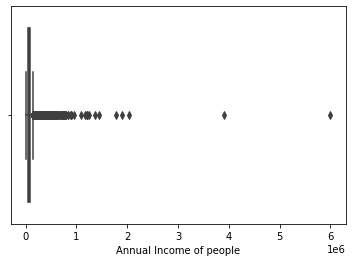

In [45]:
sns.boxplot(x=lending_set1["annual_inc"])
plt.xlabel("Annual Income of people")

<AxesSubplot:xlabel='grade', ylabel='interest_rate'>

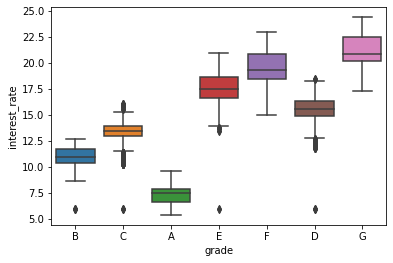

In [46]:
sns.boxplot(y=lending_set1.interest_rate,x=lending_set["grade"])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'credit_card'),
  Text(1, 0, 'car'),
  Text(2, 0, 'small_business'),
  Text(3, 0, 'other'),
  Text(4, 0, 'wedding'),
  Text(5, 0, 'debt_consolidation'),
  Text(6, 0, 'home_improvement'),
  Text(7, 0, 'major_purchase'),
  Text(8, 0, 'medical'),
  Text(9, 0, 'moving'),
  Text(10, 0, 'vacation'),
  Text(11, 0, 'house'),
  Text(12, 0, 'renewable_energy'),
  Text(13, 0, 'educational')])

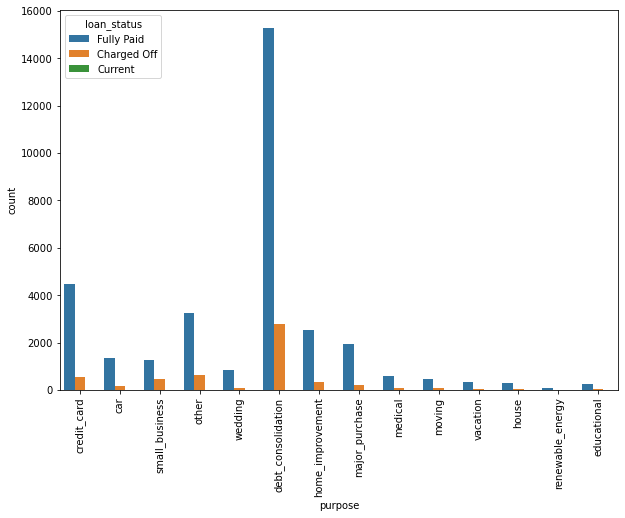

In [47]:

plt.figure(figsize=(10,7))
sns.countplot(x=lending_set1["purpose"],hue=lending_set["loan_status"])
plt.xticks(rotation=90)

Text(0.5, 0, 'Number of Term Months')

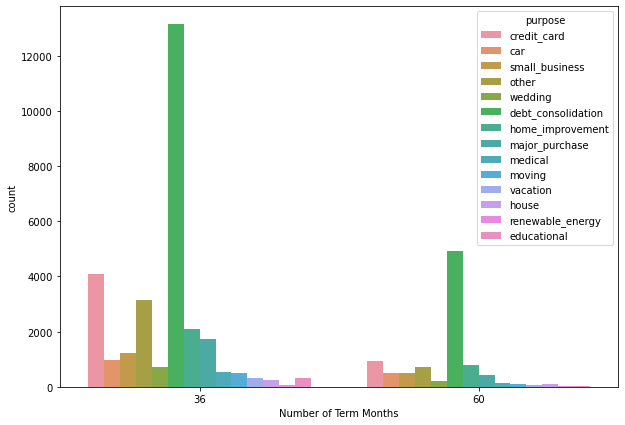

In [48]:
plt.figure(figsize=(10,7))
sns.countplot(x=lending_set1['term_months'],hue=lending_set1['purpose'])
plt.xlabel("Number of Term Months")

Text(0.5, 0, 'Number of Term Months')

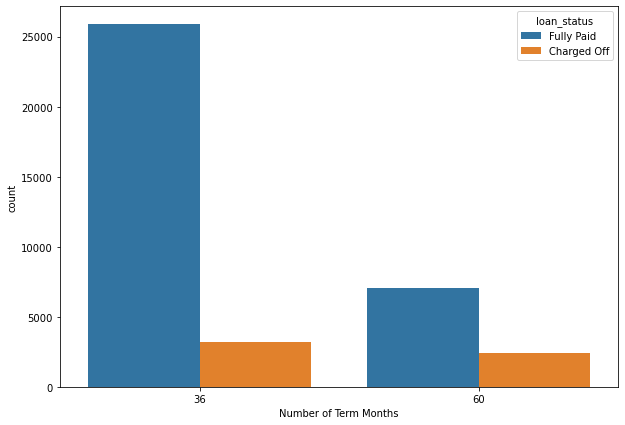

In [49]:
plt.figure(figsize=(10,7))
sns.countplot(x=lending_set1['term_months'],hue=lending_set1['loan_status'])

plt.xlabel("Number of Term Months")

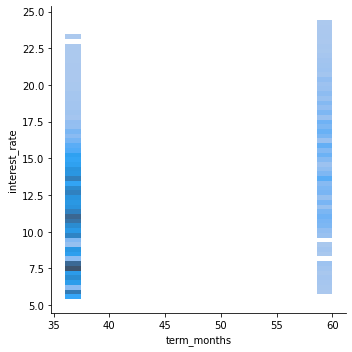

In [50]:
sns.displot(x=lending_set1.term_months,y=lending_set1.interest_rate)


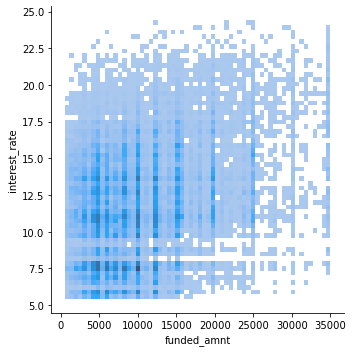

In [51]:
sns.displot(x=lending_set1.funded_amnt,y=lending_set1.interest_rate)

<AxesSubplot:>

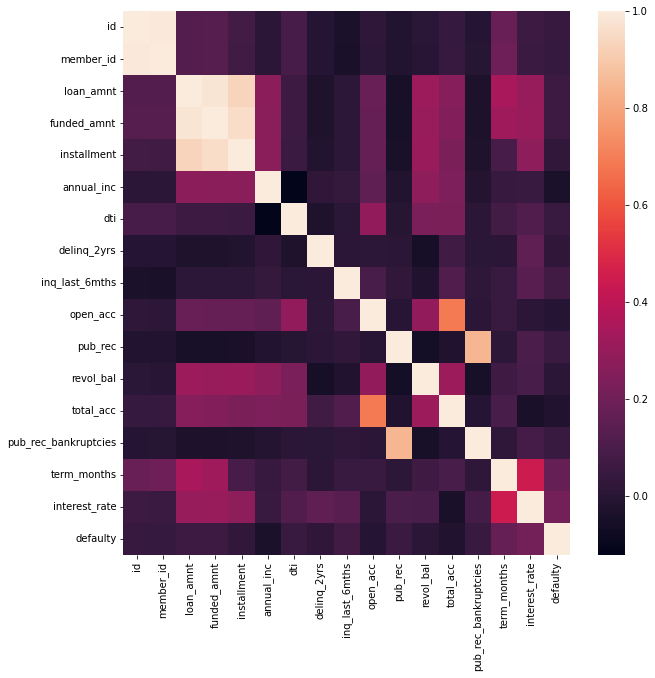

In [52]:
plt.figure(figsize=(10,10))
sns.heatmap(lending_set1.corr())

<AxesSubplot:xlabel='loan_status', ylabel='annual_inc'>

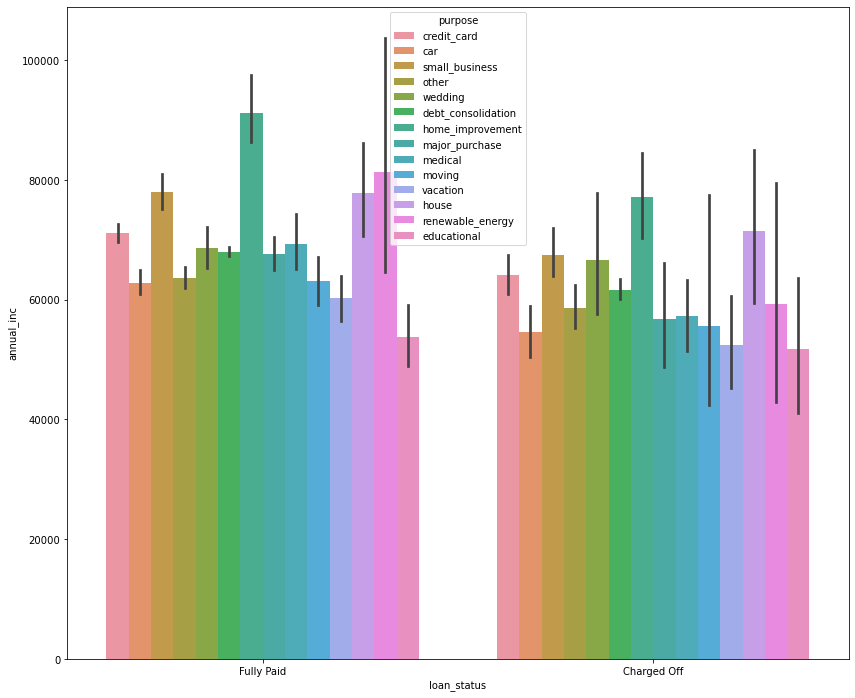

In [53]:
plt.figure(figsize=(14,12))
sns.barplot(x=lending_set1["loan_status"],y=lending_set1["annual_inc"],hue=lending_set1["purpose"])

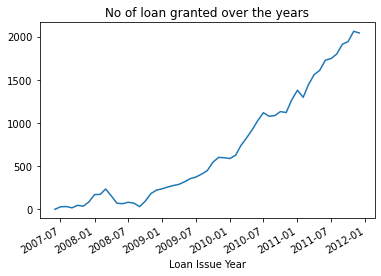

In [54]:
g = lending_set1.groupby('issue_d')['loan_status'].count()

g.plot.line(x_compat=True)
plt.title('No of loan granted over the years')
plt.xlabel('Loan Issue Year')
plt.show()

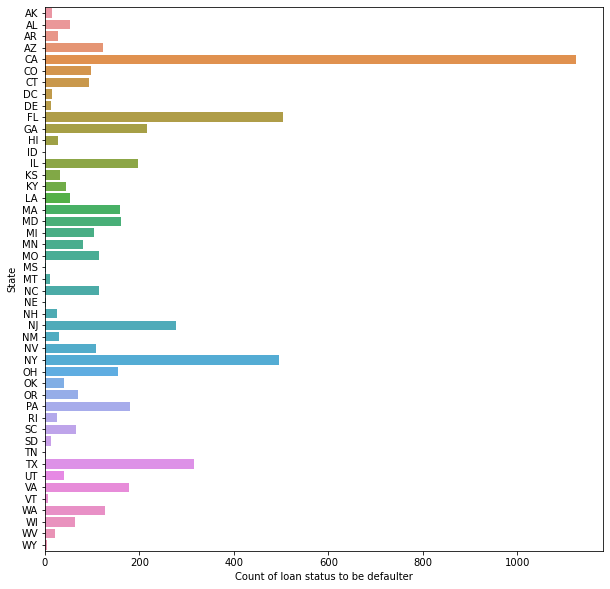

In [55]:
g = lending_set1[lending_set1['loan_status']=='Charged Off'].groupby('addr_state')['loan_status'].count().reset_index()
plt.figure(figsize=(10,10))
sns.barplot(y='addr_state', x='loan_status', data=g)
plt.xlabel('Count of loan status to be defaulter')
plt.ylabel('State')
plt.show()

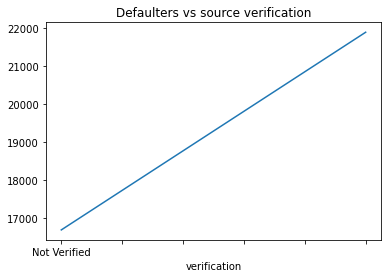

In [56]:
g = lending_set1.groupby('verification_status')['loan_status'].count()

g.plot.line(x_compat=True)
plt.title('Defaulters vs source verification')
plt.xlabel('verification')
plt.show()

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

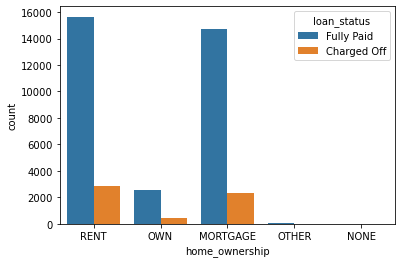

In [57]:
sns.countplot(x=lending_set1['home_ownership'],hue=lending_set1['loan_status'])

<AxesSubplot:xlabel='verification_status', ylabel='count'>

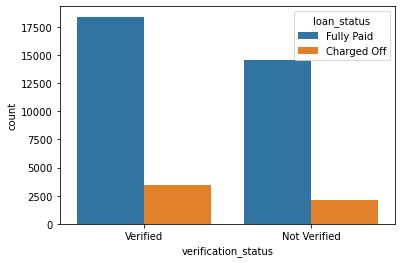

In [58]:
sns.countplot(x=lending_set1['verification_status'],hue=lending_set1['loan_status'])

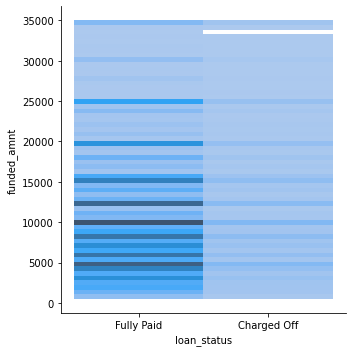

In [59]:
sns.displot(y=lending_set1["funded_amnt"],x=lending_set1.loan_status)

In [61]:
plt.figure(figsize=(15,40))


    for i in range(len(numeric_data.columns)):
    plt.subplot(8,3, i + 1)
    sns.boxplot(y=numeric_data.columns[i], x='loan_status', data=lending_set1)

plt.show()

NameError: name 'numeric_data' is not defined

<Figure size 1080x2880 with 0 Axes>